In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

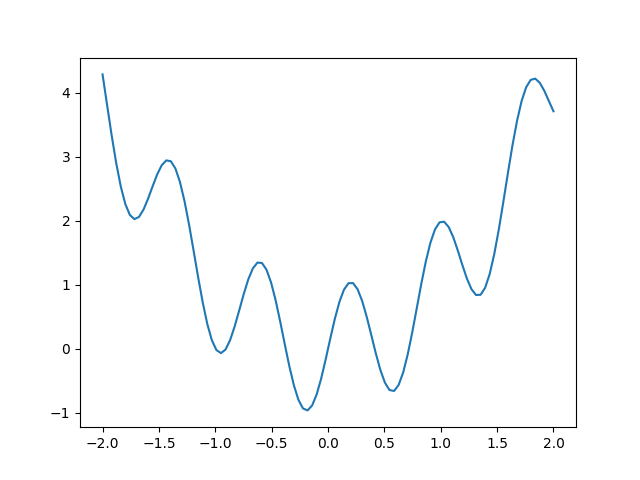

In [2]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
plt.plot(xbase, ybase)
plt.show()

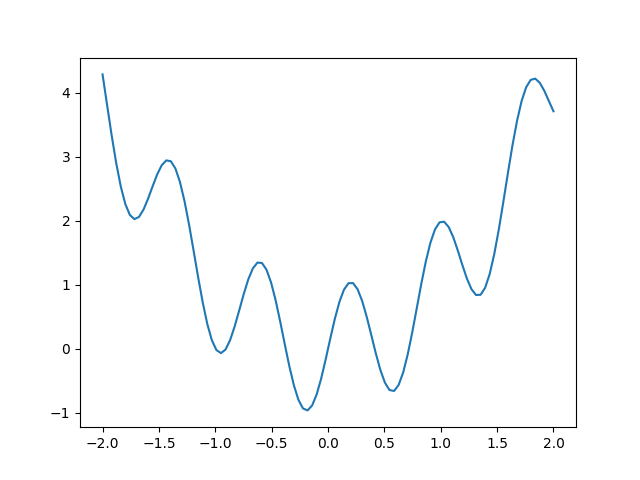

In [3]:

fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def find_min(func,starting_point,temperature, learning_rate):
    bestx=starting_point
    best_cost=100000
    bestx_lst=[]
    steps=100
    while(steps>0):
        dx=(np.random.random_sample()-0.5)*temperature
        x=bestx+dx
        y=func(x)
        if(y<best_cost):
            best_cost=y
            bestx=x
            bestx_lst.append(x)
        else:
            toss= np.random.random_sample()
            if toss < np.exp(-(y-best_cost)/temperature):
                best_cost=y
                bestx=x
                bestx_lst.append(x)
            pass
        temperature=temperature*learning_rate

    return bestx_lst
    


ani= FuncAnimation(fig,find_min, frames=range(10), interval=1000, repeat=False)
plt.show()

In [4]:
print((np.random.random_sample() ))
def yprimefunc(x):
    return 2 * x + 8 * np.cos(8*x)

0.2912169917762346


In [28]:
def findMinRoute(tsp):
    sum = 0
    counter = 0
    i = 0
    j = 0
    mn = 999999999
    visitedRouteList = {}
    visitedRouteList[0] = 1
    route = [0] *len(tsp)
    vertex_traversal_order=[]
    # print(len(tsp),len(tsp[i]))
    # print(tsp)
    while i < len(tsp) and j < len(tsp[i]):
        if counter >= len(tsp[i]) - 1:
            break
        if j!=i and j not in visitedRouteList:
            if tsp[i][j] < mn:
                mn = tsp[i][j]
                route[counter] = j + 1
        j += 1
        if j == len(tsp[i]):
            sum += mn 
            mn = 999999999 
            visitedRouteList[route[counter] - 1] = 1 
            # print(i,route[counter]-1)
            vertex_traversal_order.append(i)
            j = 0 
            i = route[counter] - 1 
            counter += 1
    
    i = route[counter - 1] - 1 
    for  j in range(0, len(tsp)):
        if i != j and tsp[i][j] < mn:
            mn = tsp[i][j]
            print(i,j)
            vertex_traversal_order.append(i)
            vertex_traversal_order.append(j)
            route[counter] = j + 1 
        
    sum += mn 
    print(sum)
    return sum,vertex_traversal_order
    
tsp =  [[-1, 10, 15, 20], [10, -1, 35, 25],
		[15, 35, -1, 30], [20, 25, 30, -1]]

findMinRoute(tsp)


2 0
80


(80, [0, 1, 3, 2, 0])

In [ ]:
print([0]*len(tsp))

In [7]:
def readfile(file):
    with open(file,'r')as f:
        lines=f.read().splitlines()
        total_cities=float(lines[0].split()[0])
        # print(total_cities)
        lst=[]
        for i in range(1,int(total_cities+1)):
            lst.append((float(lines[i].split()[0]),float(lines[i].split()[1])))
        lst=np.array(lst)
        return int(total_cities),lst
no_of_cities,cities=readfile('/Users/amankumar/Documents/semester4/Applied Programming Lab(APL)/week7/tsp_10.txt')
no_of_cities=int(no_of_cities)
print(cities)


[[3.26 7.01]
 [6.77 3.82]
 [9.69 9.97]
 [7.4  0.33]
 [4.53 1.44]
 [1.91 3.67]
 [0.28 9.05]
 [6.36 3.98]
 [9.13 8.86]
 [5.99 4.36]]


In [20]:
# nodes={}
# for i in range(len(cities)):
#     nodes.update({i:cities[i]})

# T = 3.0
# decayrate = 0.95
# bestcost = 100000

# best_array=[i for i in range(len(cities))]

# # rangemin, rangemax = -2, 2 
# # fig, ax = plt.subplots()
# # ax.plot(xbase, ybase)
# # xall, yall = [], []
# # lnall,  = ax.plot([], [], 'ro')
# # lngood, = ax.plot([], [], 'go', markersize=10)
# # import random
# def onestep(frame):
#     # print(frame)
#     global bestcost, best_array, decayrate, T
#     # Generate a random value \in -2, +2
#     # dx = (np.random.random_sample() - 0.5) * T
#     # x = bestx + dx
#     new_lst=[ele for ele in best_array]
#     np.random.shuffle(new_lst)
#     y=0
#     # print(new_lst)
#     for i in range(1,len(new_lst)):
#         # print(nodes[new_lst[i]][0],nodes[new_lst[i-1]][0])
#         y+=np.sqrt(np.square(nodes[new_lst[i]][0]-nodes[new_lst[i-1]][0])+np.square(nodes[new_lst[i]][1]-nodes[new_lst[i-1]][1]))
#     y+=np.sqrt(np.square(nodes[new_lst[len(new_lst)-1]][0]-nodes[new_lst[0]][0])+np.square(nodes[new_lst[len(new_lst)-1]][1]-nodes[new_lst[0]][1]))
#     # random.shuffle(best_array)
#     # print(f"Old x = {x}, delta = {dx}")
#     # y = yfunc(x)
#     if y < bestcost:
#         # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
#         bestcost = y
#         # bestx = x
#         best_array=new_lst
#         # lngood.set_data(x, y)
#     else:
#         toss = np.random.random_sample()
#         if toss < np.exp(-(y-bestcost)/T):
#             bestcost = y
#             # bestx = x
#             best_array=new_lst
#             # lngood.set_data(x, y)
#         # print(f"New cost {y} worse than best so far: {bestcost}")
#         pass
#     T = T * decayrate
#     # xall.append(x)
#     # yall.append(y)
#     # lnall.set_data(xall, yall)
#     # return bestcost,best_array
#     # print(bestcost)

# # ani= FuncAnimation(fig, onestep, frames=range(1000), interval=100, repeat=False)
# for i in range(10000):
#     onestep(i)
# print(bestcost)
# print(best_array)
# # plt.show()

In [21]:
# sum,vertex_traversal_order=findMinRoute(tsp1)
# print(sum,vertex_traversal_order)

In [31]:
no_of_cities1,cities1=readfile('/Users/amankumar/Documents/semester4/Applied Programming Lab(APL)/week7/tsp_100.txt')
no_of_cities1=int(no_of_cities1)
# print(no_of_cities1)
# print(cities1)
lst=[]
for i in range(no_of_cities1):
    lst1=[]
    for j in range(no_of_cities1):
        if(i==j):
            lst1.append(-1)
        else:
            lst1.append(np.sqrt(np.square(cities1[i][0]-cities1[j][0])+np.square(cities1[i][1]-cities1[j][1])))
    lst.append((lst1))
# print(len(lst[0]))
# print(lst1)
sum,traversal_order=findMinRoute(lst)

print(sum)
print(traversal_order)
len(traversal_order)
print(len(set(traversal_order)))


56 0
56 2
56 5
56 8
56 13
56 24
56 40
56 45
56 47
85.58258874171258
85.58258874171258
[0, 34, 95, 63, 38, 57, 12, 72, 92, 87, 45, 47, 68, 51, 49, 48, 75, 58, 46, 82, 98, 62, 33, 32, 79, 70, 1, 81, 44, 37, 11, 9, 66, 20, 83, 91, 28, 64, 96, 73, 90, 71, 59, 29, 53, 97, 31, 55, 3, 54, 21, 22, 36, 80, 18, 99, 7, 27, 14, 93, 65, 52, 39, 15, 50, 42, 84, 25, 86, 30, 19, 6, 76, 16, 88, 17, 41, 4, 89, 2, 5, 26, 8, 23, 13, 85, 10, 67, 78, 35, 77, 69, 43, 94, 24, 74, 40, 60, 61, 56, 0, 56, 2, 56, 5, 56, 8, 56, 13, 56, 24, 56, 40, 56, 45, 56, 47]
100


In [10]:
nodes1={}
for i in range(len(cities1)):
    nodes1.update({i:cities1[i]})
print(nodes1)

# exit()

# T = 3.0
# decayrate = 0.95
# bestcost = 100000

# best_array=[i for i in range(len(cities1))]

# # rangemin, rangemax = -2, 2 
# # fig, ax = plt.subplots()
# # ax.plot(xbase, ybase)
# # xall, yall = [], []
# # lnall,  = ax.plot([], [], 'ro')
# # lngood, = ax.plot([], [], 'go', markersize=10)
# # import random
# def onestep(frame):
#     # print(frame)
#     global bestcost, best_array, decayrate, T
#     # Generate a random value \in -2, +2
#     # dx = (np.random.random_sample() - 0.5) * T
#     # x = bestx + dx
#     new_lst=[ele for ele in best_array]
#     np.random.shuffle(new_lst)
#     y=0
#     # print(new_lst)
#     for i in range(1,len(new_lst)):
#         # print(nodes[new_lst[i]][0],nodes[new_lst[i-1]][0])
#         y+=np.sqrt(np.square(nodes1[new_lst[i]][0]-nodes1[new_lst[i-1]][0])+np.square(nodes1[new_lst[i]][1]-nodes1[new_lst[i-1]][1]))
#     y+=np.sqrt(np.square(nodes1[new_lst[len(new_lst)-1]][0]-nodes1[new_lst[0]][0])+np.square(nodes1[new_lst[len(new_lst)-1]][1]-nodes1[new_lst[0]][1]))
#     # random.shuffle(best_array)
#     # print(f"Old x = {x}, delta = {dx}")
#     # y = yfunc(x)
#     if y < bestcost:
#         # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
#         bestcost = y
#         # bestx = x
#         best_array=new_lst
#         # lngood.set_data(x, y)
#     else:
#         toss = np.random.random_sample()
#         if toss < np.exp(-(y-bestcost)/T):
#             bestcost = y
#             # bestx = x
#             best_array=new_lst
#             # lngood.set_data(x, y)
#         # print(f"New cost {y} worse than best so far: {bestcost}")
#         pass
#     T = T * decayrate
#     # xall.append(x)
#     # yall.append(y)
#     # lnall.set_data(xall, yall)
#     # return bestcost,best_array
#     # print(bestcost)

# # ani= FuncAnimation(fig, onestep, frames=range(1000), interval=100, repeat=False)
# for i in range(10000):
#     onestep(i)
# print(bestcost)
# print(best_array)
# plt.show()

{0: array([6.82, 5.93]), 1: array([1.26, 0.77]), 2: array([4.72, 3.88]), 3: array([2.16, 9.79]), 4: array([4.75, 4.65]), 5: array([5.07, 3.79]), 6: array([4.49, 7.54]), 7: array([5.39, 8.46]), 8: array([5.46, 2.7 ]), 9: array([1.74, 3.01]), 10: array([4.23, 2.16]), 11: array([0.37, 2.52]), 12: array([8.66, 5.24]), 13: array([5.66, 1.86]), 14: array([5.92, 9.78]), 15: array([8.43, 7.28]), 16: array([4.45, 6.82]), 17: array([3.78, 5.38]), 18: array([4.96, 8.  ]), 19: array([8.07, 8.2 ]), 20: array([2.37, 3.16]), 21: array([3.28, 9.07]), 22: array([3.44, 9.44]), 23: array([5.07, 2.23]), 24: array([7.55, 3.43]), 25: array([9.25, 8.38]), 26: array([5.3 , 2.95]), 27: array([5.51, 8.94]), 28: array([2.54, 4.04]), 29: array([0.18, 6.54]), 30: array([8.58, 8.73]), 31: array([0.61, 8.79]), 32: array([3.48, 0.02]), 33: array([4.23, 0.41]), 34: array([6.45, 6.05]), 35: array([3.71, 3.04]), 36: array([4.22, 8.74]), 37: array([0.36, 2.14]), 38: array([8.17, 5.  ]), 39: array([7.71, 7.33]), 40: array

In [10]:
path='/Users/amankumar/Documents/semester4/Applied Programming Lab(APL)/week7/tsp_10.txt'
l=path.split('/')
print(l[len(l)-1])

tsp_10.txt


/var/folders/ds/p5gbbfbd7c33m5_ztmmzg75w0000gn/T/ipykernel_1162/2230593016.py:34: RuntimeWarning: overflow encountered in scalar divide
  vC[i] = vC[i-1] + t_step * (iC1 / C1 + iR1)
/var/folders/ds/p5gbbfbd7c33m5_ztmmzg75w0000gn/T/ipykernel_1162/2230593016.py:33: RuntimeWarning: invalid value encountered in scalar subtract
  iL[i] = iR2 - iC1
/var/folders/ds/p5gbbfbd7c33m5_ztmmzg75w0000gn/T/ipykernel_1162/2230593016.py:34: RuntimeWarning: invalid value encountered in scalar add
  vC[i] = vC[i-1] + t_step * (iC1 / C1 + iR1)


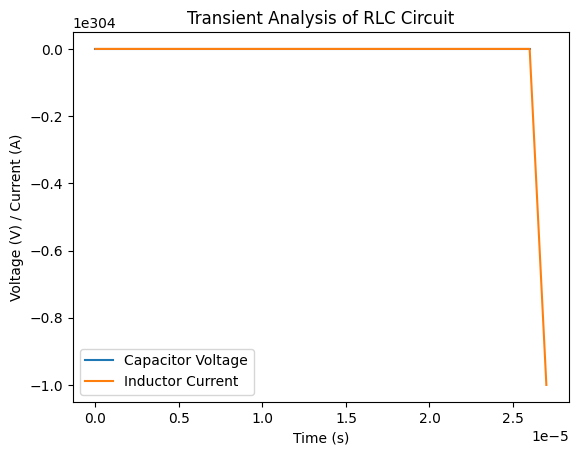

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define circuit elements
R1 = 1000 # Ohm
R2 = 2000 # Ohm
C1 = 1e-6 # Farad
V1 = 10 # Volts

# Define simulation parameters
t_start = 0 # seconds
t_end = 0.01 # seconds
t_step = 1e-6 # seconds

# Create the time vector
t = np.arange(t_start, t_end, t_step)
num_points = len(t)

# Initialize arrays for storing voltage and current values
vC = np.zeros(num_points)
iL = np.zeros(num_points)

# Define initial conditions
vC[0] = 0
iL[0] = 0

# Solve the circuit using the Euler method
for i in range(1, num_points):
    # Compute the circuit equations
    iR1 = (V1 - vC[i-1]) / R1
    iR2 = vC[i-1] / R2
    iC1 = (vC[i-1] - vC[i-2]) / t_step / C1
    iL[i] = iR2 - iC1
    vC[i] = vC[i-1] + t_step * (iC1 / C1 + iR1)

# Plot the results
plt.plot(t, vC, label='Capacitor Voltage')
plt.plot(t, iL, label='Inductor Current')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V) / Current (A)')
plt.title('Transient Analysis of RLC Circuit')
plt.legend()
plt.show()
